In [340]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 3PCF

### Load data from pynpcf

In [633]:
d = np.load('/home/ophilcox/pynpcf/outputs/test100_3PCF_n6.npz')
r1,r2 = d.f.bin_centers.T
zeta3py = d.f.zeta
d.close()

### Load data from NPCF-Estimator

In [634]:
bin1,bin2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_3pcf.txt',skiprows=4,max_rows=2).astype(int)
d2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_3pcf.txt',skiprows=7)
ells = d2[:,0].astype(int)
zeta3cpp = d2[:,1:]

### Plot

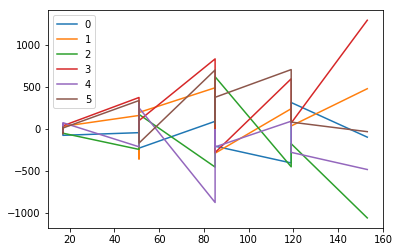

In [635]:
for ell in ells:
    plt.plot(r1,zeta3py[ell],label=ell);
plt.legend();
#plt.yscale('log')
#plt.ylim([-2000,2000])
#plt.ylim([-200000,200000])

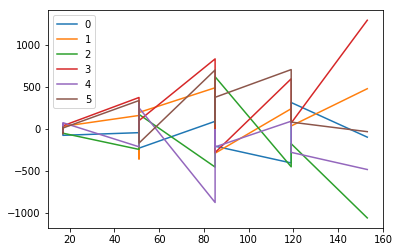

In [636]:
for ell in ells:
    plt.plot(r1,zeta3cpp[ell],label=ell);
plt.legend();

In [637]:
n_bin = len(np.unique(r1))
n_ell = len(ells)
zeta3py_mat = np.zeros((len(ells),n_bin,n_bin))
zeta3cpp_mat = np.zeros((len(ells),n_bin,n_bin))
for ell in range(n_ell):
    i = 0
    for i in range(len(bin1)):
        zeta3py_mat[ell,bin1[i],bin2[i]] = zeta3py[ell,i]
        zeta3cpp_mat[ell,bin1[i],bin2[i]] = zeta3cpp[ell,i]

/home/ophilcox/.conda/envs/ptenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


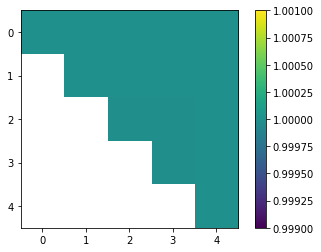

In [638]:
ell = 5
plt.imshow(zeta3py_mat[ell]/zeta3cpp_mat[ell],vmax=1.001,vmin=0.999)
plt.colorbar();

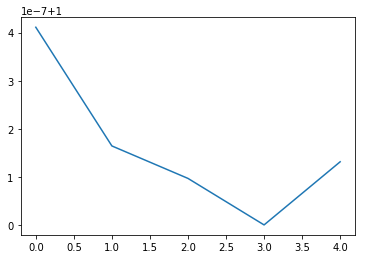

In [639]:
ell = 5
i = np.unique(bin2)[-1]
plt.plot(bin1[bin2==i],zeta3py[ell][bin2==i]/zeta3cpp[ell][bin2==i])

# 4PCF

### Load data from pynpcf

In [685]:
n_ell = 6
d = np.load('/home/ophilcox/pynpcf/outputs/test100_4PCF_n%d.npz'%n_ell)
r1,r2,r3 = d.f.bin_centers.T
zeta4py = d.f.zeta
d.close()

### Load data from NPCF-Estimator

In [686]:
bin1,bin2,bin3 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_4pcf.txt',skiprows=4,max_rows=3).astype(int)
d2 = np.loadtxt('/home/ophilcox/NPCF-Estimator/output/sample_4pcf.txt',skiprows=8)
ell1 = d2[:,0].astype(int)
ell2 = d2[:,1].astype(int)
ell3 = d2[:,2].astype(int)
zeta4cpp_inp = d2[:,3:]
zeta4cpp = np.zeros_like(zeta4py)

# rebin to match python output
for i in range(len(zeta4cpp_inp)):
    zeta4cpp[ell1[i],ell2[i],ell3[i]] = zeta4cpp_inp[i]

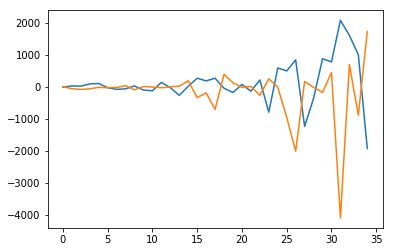

In [693]:
l1 = 2
l2 = 2
l3 = 0
plt.plot(zeta4cpp[l1,l2,l3])
plt.plot(zeta4py[l1,l2,l3])